<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

Name: Jolie Dolan<br>
RIN: 662020565

## Question 1

Construct a fully connected neural network model for classifying the CIFAR-10 dataset. Use a 70%-30% split for training and validation data.<br>
(a) Visualize the data by plotting an image from each category from the
CIFAR-10 dataset.<br>
(b) Demonstrate the tuning of the hyperparameters of the neural network
via grid-search. <br>
(c) Calculate and plot the training and validation losses of the tuned network.<br>
(d) Calculate and plot the training and validation accuracies of the tuned
network.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# load the CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# normalize the pixel values
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# one-hot encode the labels
y_train_full = to_categorical(y_train_full, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# split the data into training and validation sets (70%-30%)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Shape of x_train: (35000, 32, 32, 3)
Shape of y_train: (35000, 10)
Shape of x_val: (15000, 32, 32, 3)
Shape of y_val: (15000, 10)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 10)


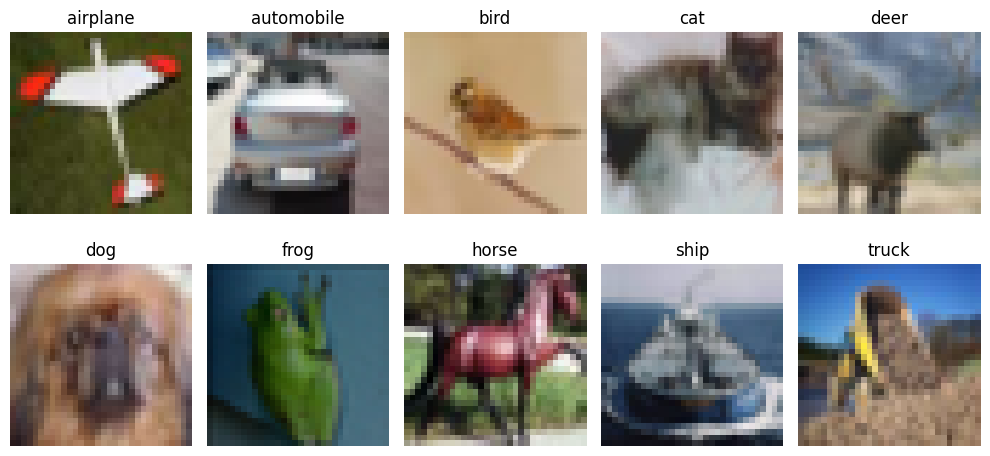

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    # find index of first image for each class
    index = np.where(np.argmax(y_train, axis=1) == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index])
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# define function to build the classifier model
def build_classifier(n_layers=1, n_neurons=50, learning_rate=0.001, dropout_rate=0.2):
    classifier = Sequential()
    # flatten the input images
    classifier.add(Flatten(input_shape=(32, 32, 3)))
    for _ in range(n_layers):
        classifier.add(Dense(units=n_neurons, activation='relu'))
        classifier.add(Dropout(dropout_rate))
    classifier.add(Dense(units=10, activation='softmax')) # Output layer with 10 classes

    optimizer = Adam(learning_rate=learning_rate)
    classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

# Define hyperparameter grid for manual grid search
param_grid = {
    'n_layers': [1, 2],
    'n_neurons': [50, 100],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.4]
}

# Perform manual grid search
best_accuracy = -1
best_params = None
results = []

# Iterate over all hyperparameter combinations
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    # Build and compile the model with current hyperparameters
    model = build_classifier(**params)

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
    print(f"Validation accuracy: {accuracy}")

    # Store results
    results.append({'params': params, 'accuracy': accuracy})

    # Check if current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best hyperparameters and accuracy
print("\nBest hyperparameters found:")
print(best_params)
print(f"Best validation accuracy: {best_accuracy}")


Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 50}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation accuracy: 0.2736000120639801
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 100}
Validation accuracy: 0.30906665325164795
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 50}
Validation accuracy: 0.18006666004657745
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 100}
Validation accuracy: 0.34353333711624146
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.01, 'n_layers': 1, 'n_neurons': 50}
Validation accuracy: 0.0957999974489212
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.01, 'n_layers': 1, 'n_neurons': 100}
Validation accuracy: 0.10000000149011612
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.01, 'n_layers': 2, 'n_neurons': 50}
Validation accuracy: 0.0957999974489212
Training with parameters: {'dropout_rate': 0.2, 'learning_rate': 0.01, 'n_layers': 2, 'n_neu

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input # Added Input here

# model with the best hyperparameters
# Assuming best_params are available from the previous grid search (Cell 750bf0e8)
# Assuming input_shape and num_classes are defined elsewhere or derived from data
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

# Assuming best_params is defined from the grid search in cell 750bf0e8
# For now, using example best_params based on the grid search output for demonstration
# Replace with actual best_params after running cell 750bf0e8
# best_params = {'dropout_rate': 0.2, 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 100}
# Using the best_params variable from cell 750bf0e8 which contains the actual best parameters.


best_model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(best_params['n_neurons'], activation='relu'),
    # Add a second Dense layer if n_layers is 2 based on best_params
    *([] if best_params['n_layers'] == 1 else [Dense(best_params['n_neurons'], activation='relu')]),
    Dropout(best_params['dropout_rate']),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# train model
# Ensure y_train and y_val are the one-hot encoded labels
history = best_model.fit(x_train, y_train,
                         batch_size=32, # Using a fixed batch size for now, consider adding to grid search
                         epochs=10, # Using a fixed number of epochs, consider adding to grid search
                         validation_data=(x_val, y_val))

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2235 - loss: 2.0840 - val_accuracy: 0.3383 - val_loss: 1.8078
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3395 - loss: 1.8300 - val_accuracy: 0.3623 - val_loss: 1.7641
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3612 - loss: 1.7801 - val_accuracy: 0.3766 - val_loss: 1.7219
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3593 - loss: 1.7647 - val_accuracy: 0.3549 - val_loss: 1.7888
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3744 - loss: 1.7461 - val_accuracy: 0.3779 - val_loss: 1.7047
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3788 - loss: 1.7214 - val_accuracy: 0.3927 - val_loss: 1.6847
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3796 - loss: 1.7164 - val_accuracy: 0.3851 - val_loss: 1.7060
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3906 - loss: 1.6911 -

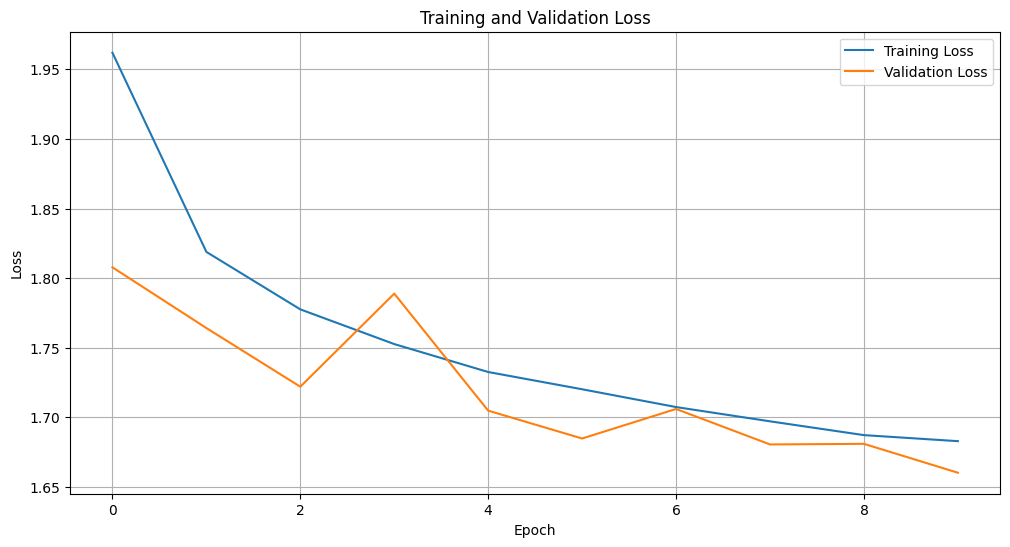

In [6]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

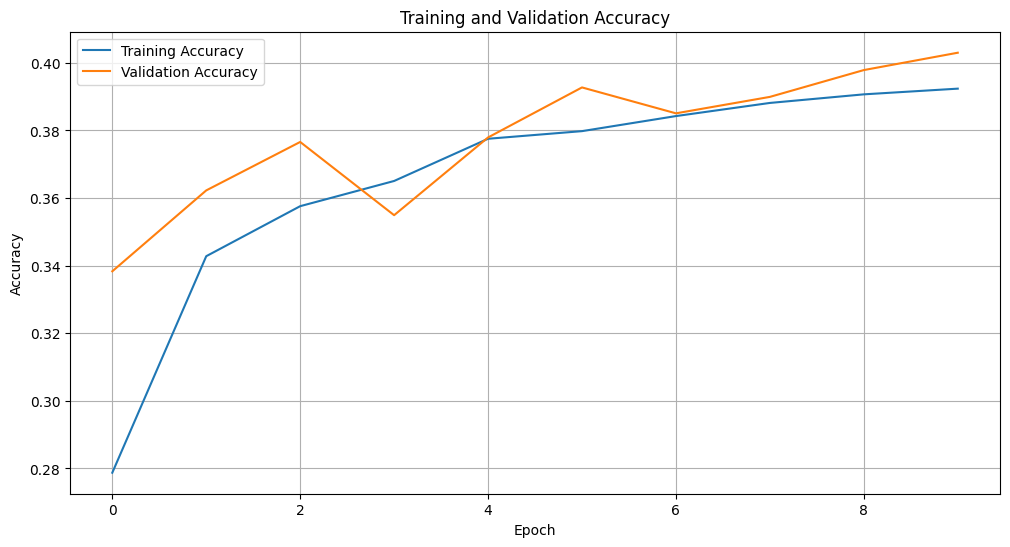

In [7]:
# plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# evaluate model on the validation set
loss, accuracy = best_model.evaluate(x_val, y_val, verbose=0)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f}")

Final Validation Loss: 1.6601
Final Validation Accuracy: 0.4030


## Question 2

Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository.
The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds
and angles of attack. The span of the airfoil and the observer position were the same in
all of the experiments. The following attributes were measured:<br>
i. Frequency, in Hz.<br>
ii. Angle of attack, in degrees.<br>
iii. Chord length, in meters.<br>
iv. Free-stream velocity, in meters per second.<br>
v. Suction side displacement thickness, in meters.<br>
The only measured output was:<br>
i. Scaled sound pressure level, in decibels<br><br>
(a) Visualize the dataset.<br>
(b) Construct a fully connected neural network model for estimating
scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30%
split.<br>
(c) Calculate the coefficient of determination.

In [10]:
import pandas as pd

# importing data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

column_names = [
    "frequency",
    "angle_of_attack",
    "chord_length",
    "free_stream_velocity",
    "suction_side_displacement_thickness",
    "scaled_sound_pressure_level"
]

df = pd.read_csv(url, sep='\t', header=None, names=column_names)
print("First 5 rows of dataset:")
display(df)

First 5 rows of dataset:


,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


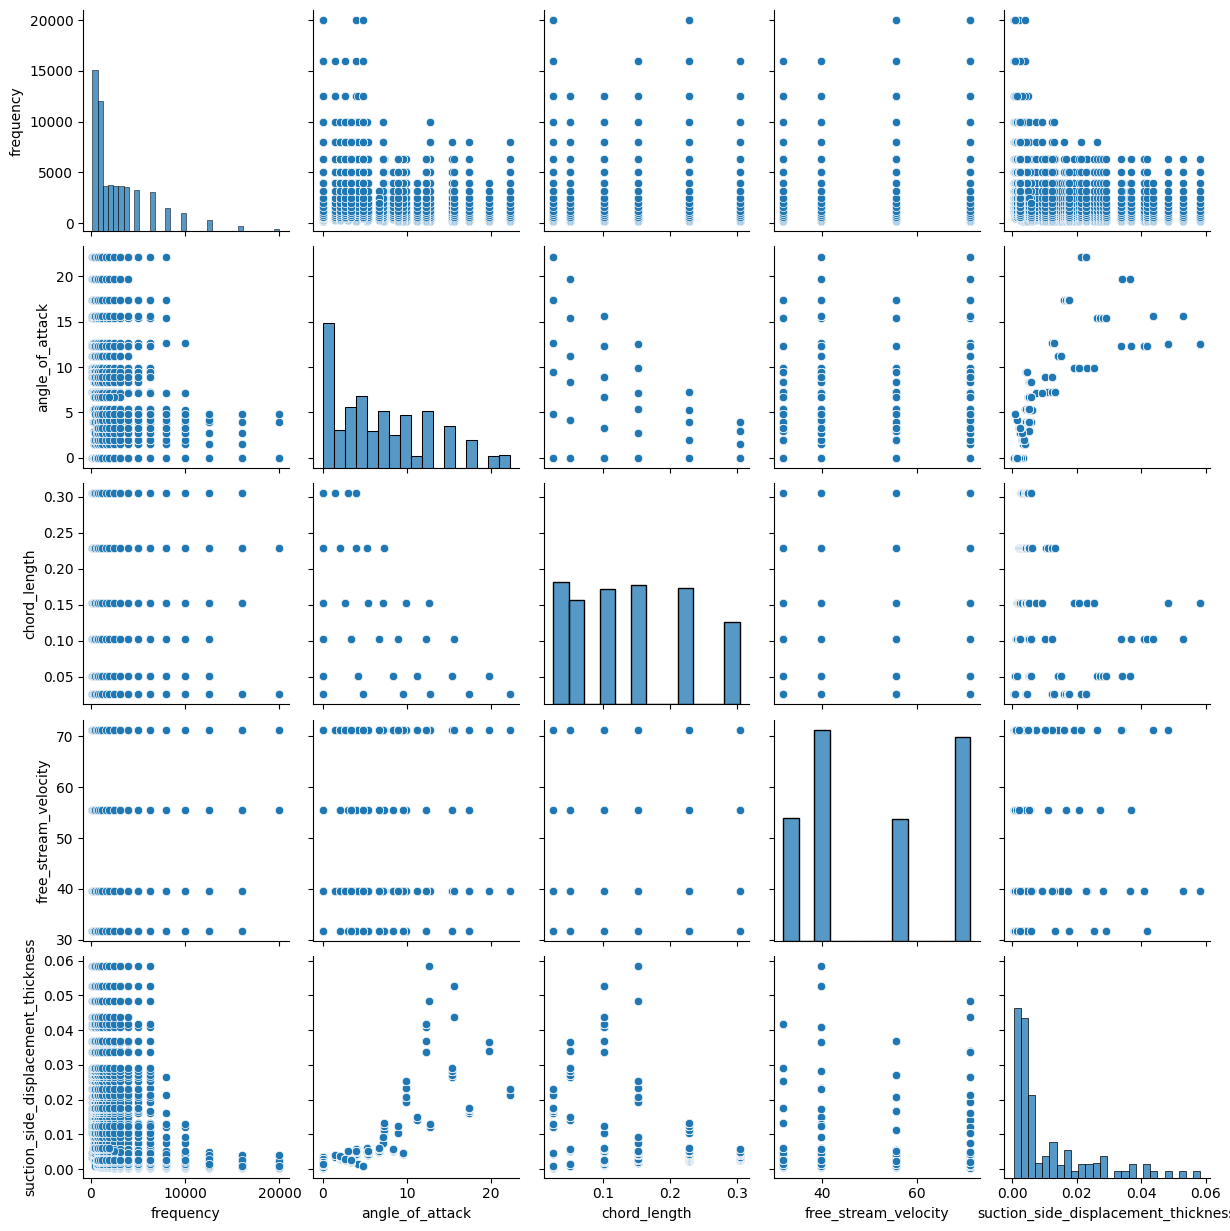

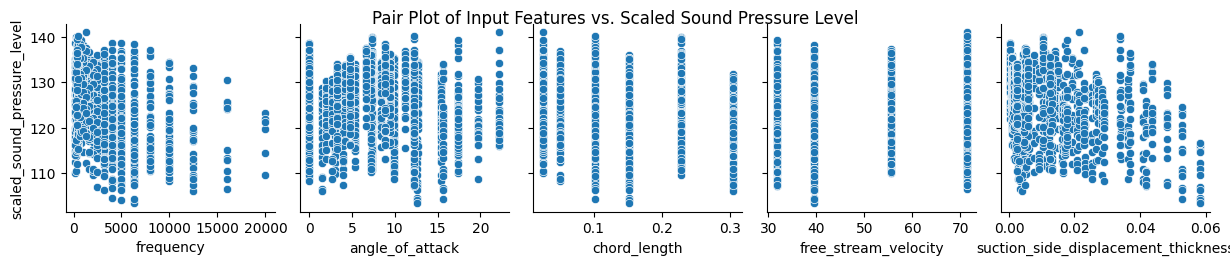

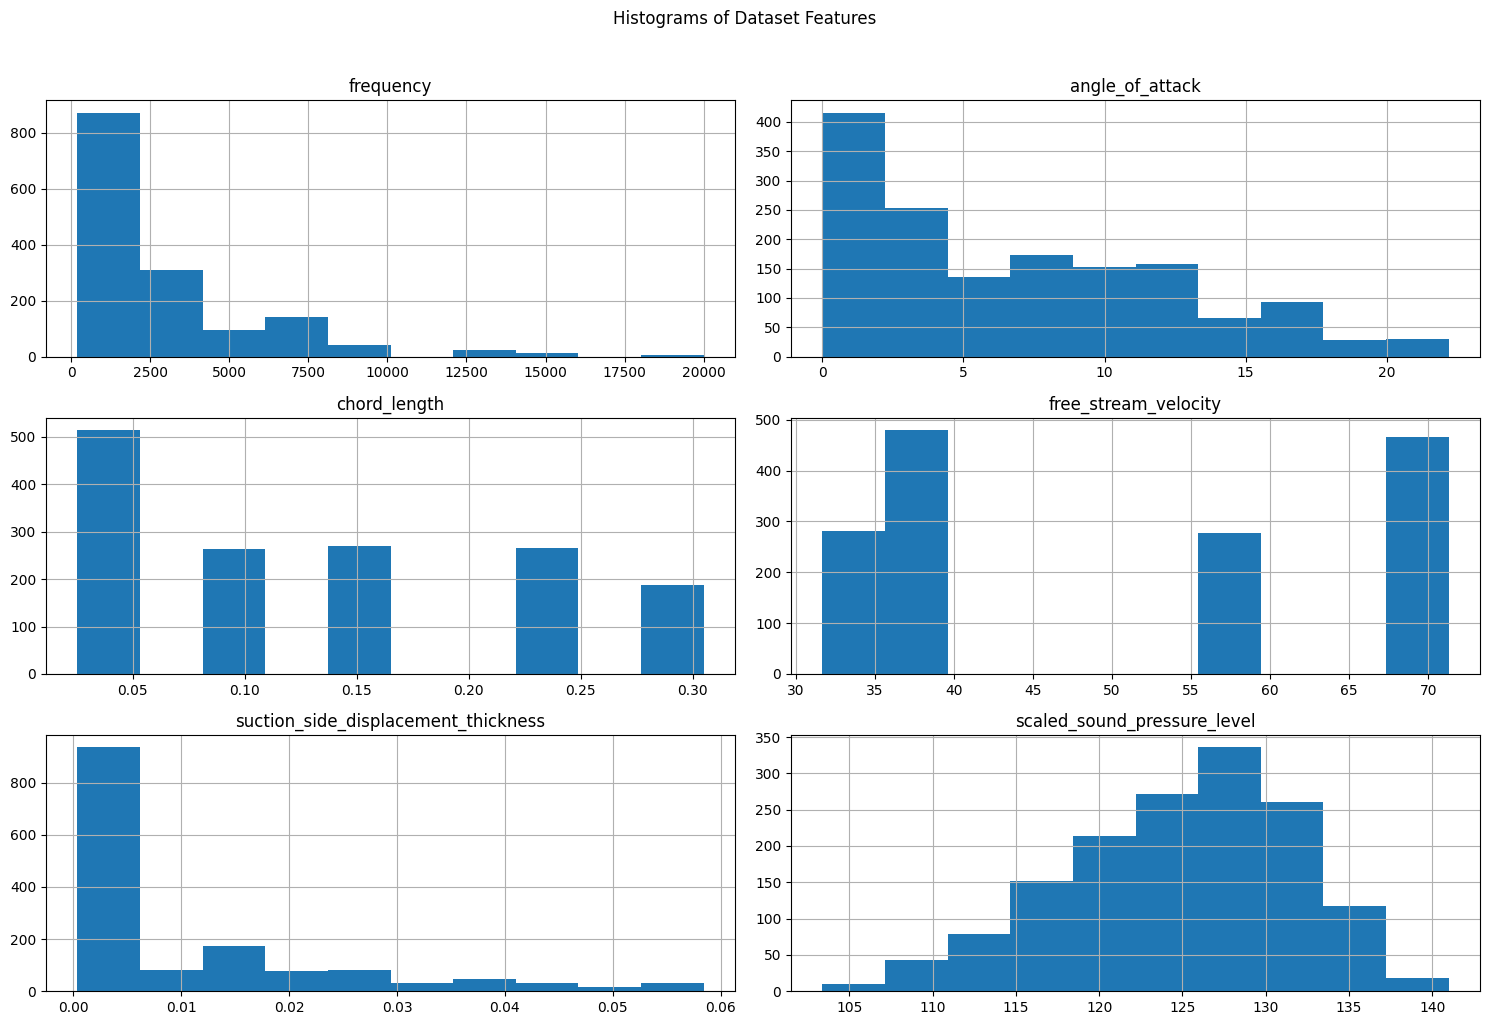

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize relationships between input features & target variable using a pair plot
sns.pairplot(df.drop('scaled_sound_pressure_level',axis=1))
sns.pairplot(df, y_vars=['scaled_sound_pressure_level'], x_vars=column_names[:-1])
plt.suptitle('Pair Plot of Input Features vs. Scaled Sound Pressure Level', y=1.02)
plt.show()

# visualize distributions of each feature & target variable using histograms
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Dataset Features', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# initializing
X = df.drop('scaled_sound_pressure_level', axis=1)
y = df['scaled_sound_pressure_level']

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train_scaled.shape[1]


model = Sequential([
    Input(shape=(input_shape,)),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='linear')
])


model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=30,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3010.2148 - mean_absolute_error: 33.0790 - val_loss: 46.9126 - val_mean_absolute_error: 5.5830
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.5462 - mean_absolute_error: 5.7050 - val_loss: 72.5835 - val_mean_absolute_error: 6.6470
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.5970 - mean_absolute_error: 5.8141 - val_loss: 54.8784 - val_mean_absolute_error: 6.2079
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.0370 - mean_absolute_error: 5.6025 - val_loss: 43.1094 - val_mean_absolute_error: 5.2513
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.1258 - mean_absolute_error: 4.5024 - val_loss: 24.5308 - val_mean_absolute_error: 3.9426
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.0084 - mean_absolute_error: 3.6401 - val_loss: 50.8003 - val_mean_absolute_error: 5.9627
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.6823 - mean_absolute_error: 3

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


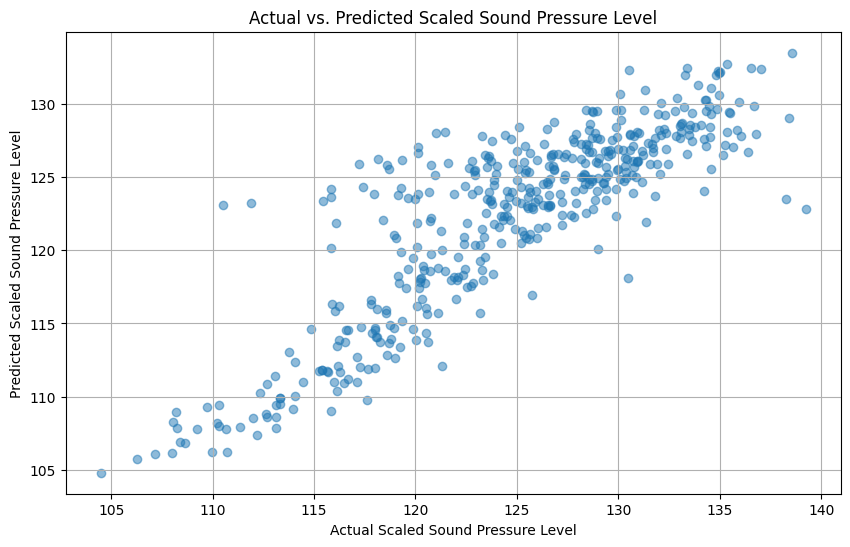

Coefficient of Determination (R-squared): 0.6040


In [13]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

# make predictions on test data
y_pred = model.predict(X_test_scaled)

# create scatter plot of actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Scaled Sound Pressure Level")
plt.ylabel("Predicted Scaled Sound Pressure Level")
plt.title("Actual vs. Predicted Scaled Sound Pressure Level")
plt.grid(True)
plt.show()

print(f"Coefficient of Determination (R-squared): {r2:.4f}")